**Project 9- Hotel Booking Demand**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies,and the number of available parking spaces, among other things.

***hotel (str) ***- Hotel (H1 = Resort Hotel or H2 = City Hotel)

***lead_time (int) ***-  Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

***arrival_date_year (int) ***- Year of arrival date

***arrival_date_month (str) ***- Month of arrival date

***arrival_date_week_number (int)*** - Week number of year for arrival date

***arrival_date_day_of_month (int) ***-  Day of arrival date

**stays_in_weekend_nights (int) -** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights (int) -** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults (int) -** Number of adults

**children (float) -** Number of children

**babies (int) -** Number of babies

**meal (str) -** Type of meal booked. Categories are presented in standard hospitality meal packages: (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal - usually dinner, FB = Full board – breakfast, lunch and dinner)

**country (str) -** Country of origin. Categories are represented in the ISO 3155–3:2013 format

**market_segment (str) -** Market segment designation (TA = Travel Agents, TO = Tour Operators)

**distribution_channel (str)** - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)

**is_repeated_guest (int) -** Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations (int) -** Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled (int) -** Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type (str) -** Code of room type reserved. Code is presented instead of designation for anonymity reasons

**assigned_room_type (str) -** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

**booking_changes (int) -** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type (str) -** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: (No Deposit = no deposit was made, Non Refund = a deposit was made in the value of the total stay cost, Refundable = a deposit was made with a value under the total cost of stay)

**agent (float) -** ID of the travel agency that made the booking
company (float) - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list (int) -** Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type (str) -** Type of booking, assuming one of four categories: (Contract = when the booking has an allotment or other type of contract associated to it, Group = when the booking is associated to a group, Transient = when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party = when the booking is transient, but is associated to at least other transient booking

**adr (float) -** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces (int) -** Number of car parking spaces required by the customer

**total_of_special_requests (int) -** Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status (str) -** Reservation last status, assuming one of three categories: (Canceled = booking was canceled by the customer, Check-Out = customer has checked in but already departed, No-Show = customer did not check-in and did inform the hotel of the reason why)

**reservation_status_date (str) -** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [28]:
# Read in the data

import numpy as np
import pandas as pd
import seaborn as sns


hotel = pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
# Check where we have missing values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Clean Continuous Variables**

Create an indicator feature

Fill in missing values

Drop irrelevant/repetitive variables

Create Indicator Feature

In [30]:
# Create indicator feature
hotel["agent_ind"] = np.where(hotel["agent"].isnull(),0,1)
hotel["company_ind"] = np.where(hotel["company"].isnull(),0,1)
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_ind,company_ind
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


**Fill Missing**

In [31]:
# Fill in missing values
hotel["children"].fillna(hotel["children"].mode()[0], inplace=True)
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_ind,company_ind
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


**Create A New Feature**

In [32]:
# Combine adults, children & babies into new family_cnt feature
hotel["family_cnt"] = hotel["adults"]+hotel["children"]+hotel["babies"]
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_ind,company_ind,family_cnt
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0,2.0


**Drop Unnnecessary Variables**

In [22]:
# Drop irrelevant continuous variable
#hotel.drop(["agent"], axis=1, inplace=True)
#hotel.drop(["company"], axis=1, inplace=True)
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_ind,company_ind
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


**Clean Categorical Variables**

Fill in missing values

Converting dtype

**Fill Missing**

In [24]:
# Fill in missing values
hotel["country"].fillna(hotel["country"].mode()[0], inplace=True)
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_ind,company_ind
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


**Converting dtype**

In [33]:
# Converting dtype to 'int64'
hotel["family_cnt"] = hotel["family_cnt"].astype("int64")

**Data Analysis**

See the distribution of our target variable

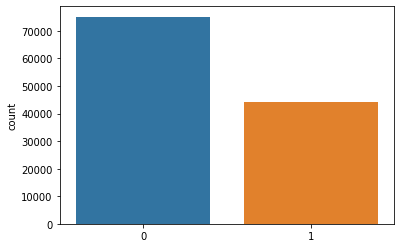

In [36]:
sns.countplot(x=hotel["is_canceled"]).set(xlabel=None);

**Which hotel contains maximum number of bookings?**

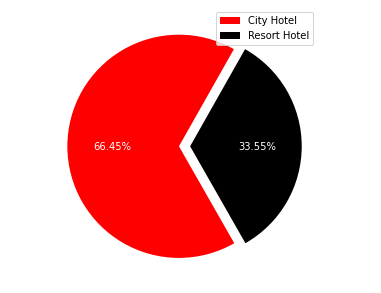

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(5,7))
labels = ["City Hotel","Resort Hotel"]
booking = hotel["hotel"].value_counts()
color = ["red","black"]
plt.pie(booking, labels=labels, colors=color, explode=(0,0.1), textprops={"color":"w"}, autopct="%.2f%%", startangle=60.5)
plt.legend(loc="upper right");